In [13]:
import pandas as pd
import re

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'

# Initialize an empty list to store parsed data
datalist = []
stream_count = 0

# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message, stream_count])
    stream_count += 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message", "stream"])

data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by=['user', 'date'])

# Calculate the total number of messages per stream per user
total_messages_per_stream = data.groupby(['user', 'stream']).size().reset_index(name='total_messages')

# Calculate the time difference between the first and last messages for each stream per user
watch_lengths = data.groupby(['user', 'stream'])['date'].agg(lambda x: (x.max() - x.min()).total_seconds()).reset_index(name='watch_length')

# Calculate the total stream length for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds()).reset_index(name='stream_length')

# Merge the user-specific data with the stream length data
user_stats = total_messages_per_stream.merge(watch_lengths, on=['user', 'stream'])
user_stats = user_stats.merge(stream_lengths, on='stream')

# Add calculated columns
user_stats['watch_length_in_hour'] = user_stats['watch_length'] / 3600
user_stats['stream_length_in_hour'] = user_stats['stream_length'] / 3600
user_stats['percentage'] = user_stats['watch_length'] / user_stats['stream_length'] * 100

# Sort and reset index
user_stats = user_stats.sort_values(by=['user', 'stream']).reset_index(drop=True)

# Calculate total watch time for all users
all_users_watch = user_stats.groupby('user')['watch_length'].sum().reset_index(name='total_watch_length')
all_users_watch['total_watch_length_in_days'] = all_users_watch['total_watch_length'] / 3600 / 24




In [27]:
all_time_s = 1423338

all_users_watch['percentage'] = all_users_watch['total_watch_length'] / all_time_s *100

all_users_watch[all_users_watch['percentage'] > 0]['percentage'].describe()

count    4078.000000
mean        0.968539
std         4.494406
min         0.000070
25%         0.010047
50%         0.056030
75%         0.472077
max        99.197028
Name: percentage, dtype: float64

In [26]:
a_u_chat = all_time_s * (all_users_watch[all_users_watch['percentage'] > 0]['percentage'].mean()/100) /60 

print('avg user chat:', a_u_chat)

all_users_watch['percentage'].mean()

avg user chat: 229.75970246853032


0.6256457495490835

In [28]:
all_time_s * (0.056030/100) /60 

13.291604690000002

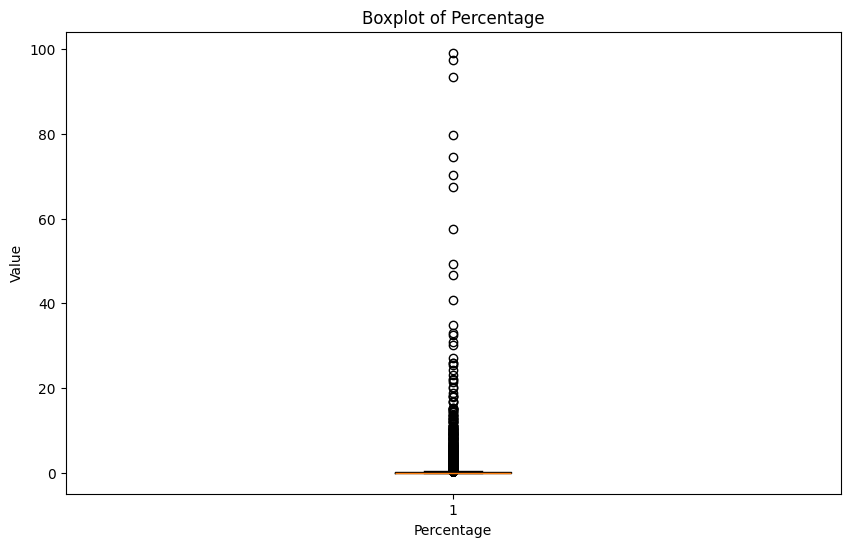

In [16]:
import matplotlib.pyplot as plt

# Assuming 'all_users_watch' is your DataFrame
plt.figure(figsize=(10, 6))  # Optional: set the size of the plot
plt.boxplot(all_users_watch['percentage'])

plt.title('Boxplot of Percentage')
plt.xlabel('Percentage')
plt.ylabel('Value')
plt.show()


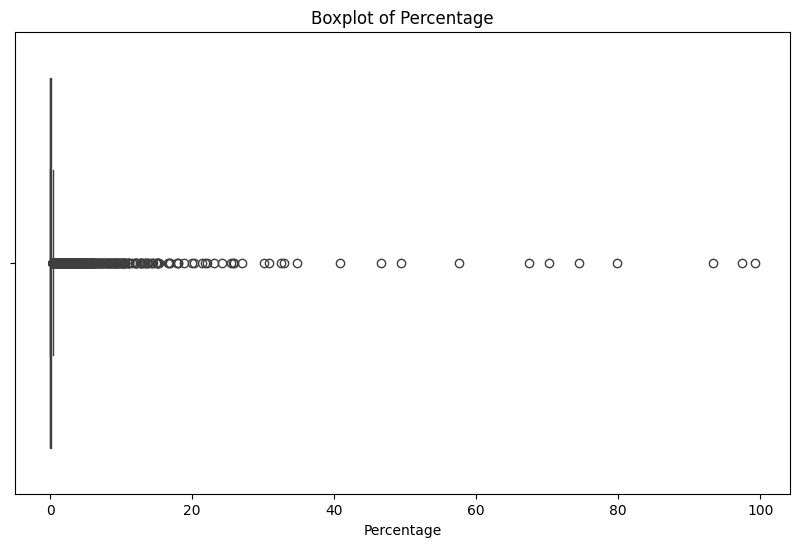

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_users_watch' is your DataFrame
plt.figure(figsize=(10, 6))  # Optional: set the size of the plot
sns.boxplot(x=all_users_watch['percentage'])

plt.title('Boxplot of Percentage')
plt.xlabel('Percentage')
plt.show()


In [18]:
all_users_watch[all_users_watch['percentage']>30].sort_values(by='percentage')

,user,total_watch_length,total_watch_length_in_days,percentage
2928,enseje,428575.0,4.960359,30.110557
206,Aloddin,438823.0,5.078970,30.830555
1827,Zeololz,463432.0,5.363796,32.559519
1704,Typhu25,469421.0,5.433113,32.980290
406,Cuhhsin,495010.0,5.729282,34.778106
6160,ylb_cat_soul22,581193.0,6.726771,40.833098
1387,Risc__V,663149.0,7.675336,46.591112
284,Banties1g,703304.0,8.140093,49.412297
3863,klimzaa,818690.0,9.475579,57.519015
3446,icep1cke,960180.0,11.113194,67.459732


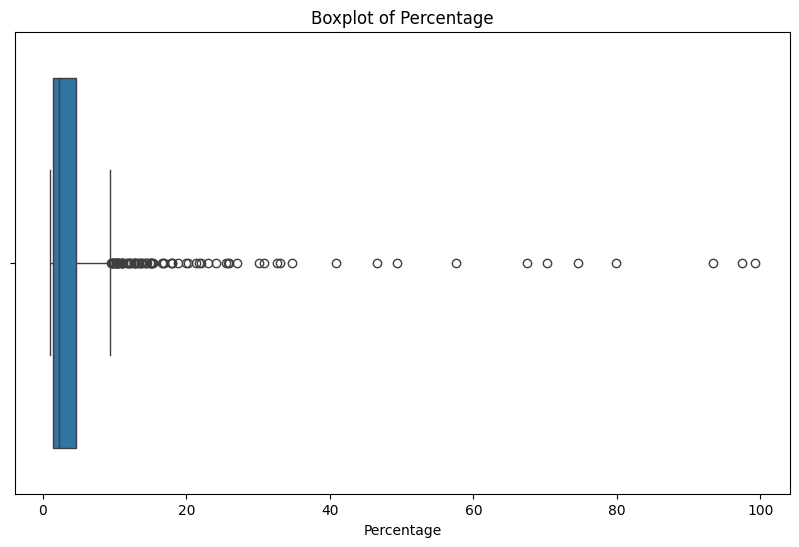

In [19]:
# Assuming 'all_users_watch' is your DataFrame
plt.figure(figsize=(10, 6))  # Optional: set the size of the plot
sns.boxplot(x=all_users_watch[all_users_watch['percentage']>1]['percentage'])

plt.title('Boxplot of Percentage')
plt.xlabel('Percentage')
plt.show()